This post shows how to create a Gradio App (app.py) and run it locally in a browser. This app should:  

- Allow users to **upload an image**  
- Make a **Prediction** of the breed of dog or cat
- Provide a **Probability** on the predictions of available breeds (dataset used only has 37 different breeds)  

This post is part of a series:  
Part 1: Create **Learner** (.pkl file)  
Part 2: Create **Gradio** application file (app.py)    
Part 3: Upload to **HuggingSpace** account

## Part 2: Create Gradio application file (app.py)

## 1. Import Gradio and Fast AI libraries

In [1]:
from fastai.vision.all import * 
import gradio as gr

c:\Users\tonyp\miniconda3\envs\fastai\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


## 2. Import Learner (.pkl file)

Recall, this file was created and exported in [Part 1](https://tonyjustdevs.github.io/blog/posts/2024-01-24-99_multi_classifier/pt1_create_learner.html)

- If you're running on a Linux, you shouldn't have any import issues.    
- If you're running a Windows PC, you'll likely to experience an error.


In [4]:
pets_learner = load_learner('pets_learner.pkl') 

NotImplementedError: cannot instantiate 'PosixPath' on your system

### 2.1 Import Learner Error (.pkl file) Solution (Windows only)

I found a solution [here](https://forums.fast.ai/t/couldnt-load-learner-in-windows/89388).  
Not too sure why this happens, probably linux vs windows compatibility, forward vs backlashes probably?

Import the `pathlib` library below and run the code below to fix the paths:

**Note**:   
- This ***fix*** is only required during the **testing** phase of our Gradio App.     
    - This **testing** phase is defined as being able to run the Gradio App locally.  
- When we **Upload to HuggingFace** Spaces, this code fix is not required (because HF is run on Linux, hence no Posix issues, from my understanding) 

In [6]:
# only run to import pkl in windows when youre doing testing in windows | when run in hus | its run via dock images ie linux ie no problems
import pathlib # 
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

In [11]:
pets_learner = load_learner('pets_learner.pkl')

## 3 Predict the Breed with Imported Learner

### 3.1 Import Local Image

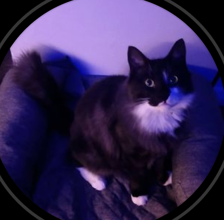

In [9]:
pet1 = PILImage.create('pet1.jpg')
pet1.thumbnail((224,224))
pet1

### 3.2 Make prediction

Use `predict()` to make prediction on the uploaded local image.
The results will have 3 items:  
1. The prediction of the breed.  
2. Index of the Tensor (in point 3.)  
3. A Tensor of length 37. Why the odd number?    
- These are the probabilities of each unique breeds in our data!    
- Recall in Part 1, we determined the different categories by using a [custom labelling function](https://tonyjustdevs.github.io/blog/posts/2024-01-24-99_multi_classifier/pt1_create_learner.html#a-different-labelling-function)

In [40]:
res = pets_learner.predict(pet1)
res

c:\Users\tonyp\miniconda3\envs\fastai\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


('Bombay',
 tensor(3),
 tensor([3.4475e-02, 1.7813e-03, 8.1388e-03, 6.3685e-01, 6.0993e-03, 4.8830e-04,
         5.0747e-02, 8.8036e-03, 2.1084e-01, 3.4832e-02, 9.6598e-04, 7.6646e-04,
         6.3764e-04, 2.5949e-04, 8.7999e-05, 1.3308e-03, 6.6650e-05, 5.7116e-05,
         9.0377e-04, 6.9052e-05, 2.0095e-04, 2.1758e-05, 2.5767e-04, 2.1859e-05,
         3.8547e-05, 1.6165e-06, 6.2601e-05, 4.3552e-05, 1.4901e-04, 9.6175e-05,
         1.0010e-04, 1.3717e-04, 2.7684e-04, 5.5386e-05, 5.7012e-05, 4.6809e-05,
         2.2643e-04]))

### 3.3 What is the probabilities representing?

The probabilities tensor from `predict()` are the unique categories in our data and are stored in our dataloader

In [28]:
categories = pets_learner.dls.vocab 
categories

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']

### 3.4 The prediction and probabilities of our image

In [34]:
# get index of predction
idx = res[1]

# store list of probalities of our predction
probabilities = res[2]

# get breed and probability of our prediction
categories[idx],probabilities[idx]



('Bombay', tensor(0.6369))

### 3.5 Probability of every category available

In [35]:
def classify_image_fn(img):
    prediction, idx, probabilities = pets_learner.predict(img)
    return dict(zip(categories, map(float, probabilities)))

classify_image_fn(pet1)     # names and probabilities

c:\Users\tonyp\miniconda3\envs\fastai\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


{'Abyssinian': 0.034474823623895645,
 'Bengal': 0.0017812795704230666,
 'Birman': 0.008138809353113174,
 'Bombay': 0.6368528604507446,
 'British_Shorthair': 0.006099338177591562,
 'Egyptian_Mau': 0.0004883029614575207,
 'Maine_Coon': 0.05074741691350937,
 'Persian': 0.008803554810583591,
 'Ragdoll': 0.21084259450435638,
 'Russian_Blue': 0.03483246639370918,
 'Siamese': 0.0009659799397923052,
 'Sphynx': 0.0007664564182050526,
 'american_bulldog': 0.0006376394885592163,
 'american_pit_bull_terrier': 0.0002594943216536194,
 'basset_hound': 8.799932402325794e-05,
 'beagle': 0.0013307805638760328,
 'boxer': 6.664981629000977e-05,
 'chihuahua': 5.711586709367111e-05,
 'english_cocker_spaniel': 0.0009037724230438471,
 'english_setter': 6.905203190399334e-05,
 'german_shorthaired': 0.00020094779029022902,
 'great_pyrenees': 2.1758336515631527e-05,
 'havanese': 0.0002576670085545629,
 'japanese_chin': 2.1859435946680605e-05,
 'keeshond': 3.85471066692844e-05,
 'leonberger': 1.616517351976654e-0

## 4 Run local Gradio App

Theres a variety of ways to alter the app, I've set the size of the images and provided some examples:

In [ ]:
gr_image = gr.Image(width=244, height=244)
gr_label = gr.Label()

input_examples = ['pet1.jpg','pet2.jpg','pet3.jpg','pet4.jpg','pet5.jpg']
intf = gr.Interface(fn=classify_image_fn,
                    inputs=gr_image,    
                    outputs=gr_label,
                    examples=input_examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


c:\Users\tonyp\miniconda3\envs\fastai\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


c:\Users\tonyp\miniconda3\envs\fastai\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


c:\Users\tonyp\miniconda3\envs\fastai\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


### 4.1 Open Local Gradio App

Open the URL provided in your favourite browser  

![](gradio_local.jpg)


### 4.2 Test it out  

The app knows a pug when it sees one! The app is ready.

![](gradio_local_pug.jpg)  



## 5. Export (app.py)

Gradio app must be all inside a `app.py` script when being deployed on HuggingFaces.

Thankfully, there is a library to export all the **cell-blocks** from our notebook (.ipynb) to python script (app.py).  
[Reference](https://nbdev.fast.ai/tutorials/tutorial.html)


### 5.1 Put directives at front of notebook  

- Place '#| default_exp app' in a python codeblock in front of the the notebook  

![](gradio_default_app.jpg)

### 5.2 Choose the cellblocks to export  
      
- Place '#| export' in front of each codeblock you need to export  

![](gradio_clean.jpg)


### 5.3 Run nbdev and export

In [39]:
from nbdev.export import nb_export
nb_export('app.ipynb')

This will create a new folder as home directory and place in the `app.py`  

![](gradio_app.jpg) 

## To be Continued...  

[Part 2: Create **Gradio** application file (app.py)](https://tonyjustdevs.github.io/blog/posts/2024-01-24-99_multi_classifier/pt1_create_learner.html)    
[Part 3: Upload to **HuggingSpace** account]